# Tema : Clasificador Naive Bayes

Cargue el dataset adult.csv y desarrolle un modelo predictivo Naive Bayes
considerando los siguientes puntos:
1. Importar datos
2. Análisis Exploratorio
3. Definición de features y target
4. Dividir datos en training y test
5. Feature Engineering
6. Escalamiento de features
7. Entrenamiento del modelo
8. Predicciones
9. Cálculo de exactitud
10. Matriz de confusión
11. Otras medidas de evaluación
12. Probabilidades de clases
13. Curvas ROC – AUC
14. Validación cruzada k-fold


1. Importar datos


In [38]:
# cargar csv

import pandas as pd

df = pd.read_csv('adult.csv')

# Print the first few rows of the DataFrame
df.head()


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K



2. Análisis Exploratorio


In [39]:
# Visualizar las primeras filas del DataFrame
print(df.head())

   39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K 

In [40]:
# Definir nombres de columnas
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

# Agregar nombres de columnas al DataFrame
df.columns = column_names

# Verificar las primeras filas del DataFrame
print(df.head())

   age          workclass  fnlwgt   education  education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        marital_status          occupation    relationship    race      sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0             0             0              13   United-States   <=50

In [41]:
# Obtener información sobre el DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [42]:
# Resumen estadístico de las características numéricas
print(df.describe())

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [43]:
# Contar los valores únicos en la columna 'income'
print(df['income'].value_counts())


income
 <=50K    24719
 >50K      7841
Name: count, dtype: int64


In [44]:
df#.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


3. Definición de features y target


In [45]:
# Definir características (features) y target
X = df.drop('income', axis=1)  # Características
y = df['income']  # Variable objetivo


4. Dividir datos en training y test


In [46]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las formas (shapes) de los conjuntos de datos resultantes
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)


Forma de X_train: (26048, 14)
Forma de X_test: (6512, 14)
Forma de y_train: (26048,)
Forma de y_test: (6512,)


5. Feature Engineering


In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder # Transforma variables categoricas a 0, 1 es similar a get_dummies()
from sklearn.impute import SimpleImputer # Reemplaza valores faltantes, puede usar promedio, moda(valor mas frecuente)
from sklearn.compose import ColumnTransformer # considera la transformacion entre variables num y cat
from sklearn.pipeline import Pipeline

In [ ]:
'''# Que es un OneHotEncoder:
dat_X = {'Col': ['A', 'B', 'C', 'B']}
X = pd.DataFrame(dat_X)
print(X)

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

print(ohe.fit_transform(X[['Col']]))'''


In [48]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Definir transformadores para características numéricas y categóricas
numeric_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
categorical_features = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

# Transformador para características numéricas: imputar valores faltantes con la mediana y escalar características
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Imputar valores faltantes con la mediana
    ('scaler', StandardScaler())  # Estandarizar características numéricas
])

# Transformador para características categóricas: imputar valores faltantes con la moda y codificar con one-hot
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores faltantes con la moda
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificar características categóricas con one-hot
])

# Combinar transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  # Aplicar transformador numérico a características numéricas
        ('cat', categorical_transformer, categorical_features)  # Aplicar transformador categórico a características categóricas
    ])

# Aplicar transformaciones a las características
X_train_processed = preprocessor.fit_transform(X_train)  # Ajustar y transformar características de entrenamiento
X_test_processed = preprocessor.transform(X_test)  # Transformar características de prueba utilizando ajustes de entrenamiento


In [49]:
print(X_train_processed.shape)
print(X_test_processed.shape)

(26048, 108)
(6512, 108)


In [50]:
# Aplicar la codificación one-hot a las variables categóricas en el conjunto de entrenamiento
X_train_encoded = pd.get_dummies(X_train)

# Aplicar la misma codificación one-hot al conjunto de prueba
X_test_encoded = pd.get_dummies(X_test)

# Asegurarse de que ambas codificaciones tengan las mismas columnas
final_columns = list(final_columns)
X_train_encoded = X_train_encoded[final_columns]
X_test_encoded = X_test_encoded[final_columns]

# Mostrar los conjuntos de datos codificados
print("Conjunto de entrenamiento:")
print(X_train_encoded.head())
print("\nConjunto de prueba:")
print(X_test_encoded.head())

Conjunto de entrenamiento:
       native_country_ ?  occupation_ Sales  marital_status_ Separated  \
24639              False              False                      False   
5514               False              False                      False   
19777              False              False                      False   
10781               True              False                      False   
32239              False              False                      False   

       native_country_ Dominican-Republic  relationship_ Own-child  \
24639                               False                     True   
5514                                False                     True   
19777                               False                    False   
10781                               False                    False   
32239                               False                    False   

       education_ HS-grad  native_country_ Ecuador  \
24639               False                    False   

In [51]:
print("Conjunto de entrenamiento:")
print(X_train_encoded.shape)
print("\nConjunto de prueba:")
print(X_test_encoded.shape)

Conjunto de entrenamiento:
(26048, 106)

Conjunto de prueba:
(6512, 106)


In [52]:
X_train_encoded

,native_country_ ?,occupation_ Sales,marital_status_ Separated,native_country_ Dominican-Republic,relationship_ Own-child,education_ HS-grad,native_country_ Ecuador,native_country_ United-States,native_country_ Cuba,education_ Some-college,...,native_country_ Honduras,native_country_ Vietnam,capital_loss,education_ 9th,occupation_ Prof-specialty,workclass_ Local-gov,sex_ Female,native_country_ Taiwan,race_ Asian-Pac-Islander,education_ 12th
24639,False,False,False,False,True,False,False,True,False,False,...,False,False,0,False,False,False,False,False,False,True
5514,False,False,False,False,True,False,False,True,False,True,...,False,False,0,False,False,False,True,False,False,False
19777,False,False,False,False,False,False,False,True,False,True,...,False,False,0,False,False,False,True,False,False,False
10781,True,False,False,False,False,True,False,False,False,False,...,False,False,0,False,False,False,False,False,False,False
32239,False,False,False,False,False,False,False,True,False,False,...,False,False,0,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,False,True,False,False,False,False,False,True,False,False,...,False,False,0,False,False,False,True,False,False,False
5390,False,False,False,False,False,True,False,True,False,False,...,False,False,0,False,False,False,True,False,False,False
860,False,False,False,False,False,True,False,False,False,False,...,False,False,0,False,False,False,False,False,False,False
15795,False,False,False,False,False,True,False,True,False,False,...,False,False,0,False,False,False,True,False,False,False


In [53]:
X_test_encoded

,native_country_ ?,occupation_ Sales,marital_status_ Separated,native_country_ Dominican-Republic,relationship_ Own-child,education_ HS-grad,native_country_ Ecuador,native_country_ United-States,native_country_ Cuba,education_ Some-college,...,native_country_ Honduras,native_country_ Vietnam,capital_loss,education_ 9th,occupation_ Prof-specialty,workclass_ Local-gov,sex_ Female,native_country_ Taiwan,race_ Asian-Pac-Islander,education_ 12th
14160,False,False,False,False,False,True,False,True,False,False,...,False,False,0,False,False,False,True,False,False,False
27047,False,False,False,False,False,True,False,True,False,False,...,False,False,0,False,False,False,True,False,False,False
28867,False,False,False,False,False,False,False,True,False,False,...,False,False,0,False,False,False,False,False,False,False
5667,False,False,False,False,False,False,False,True,False,False,...,False,False,0,False,True,False,False,False,False,False
7827,False,False,False,False,False,False,False,True,False,False,...,False,False,0,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13307,False,False,False,False,False,False,False,True,False,True,...,False,False,0,False,False,False,False,False,False,False
1338,False,False,False,False,False,False,False,True,False,True,...,False,False,0,False,False,False,False,False,False,False
24534,False,True,False,False,True,False,False,True,False,False,...,False,False,0,False,False,False,False,False,False,False
18080,False,False,False,False,False,False,False,True,False,True,...,False,False,0,False,False,False,False,False,False,False


6. Escalamiento de features


In [54]:
from sklearn.preprocessing import StandardScaler

# Inicializar el escalador
scaler = StandardScaler()

# Aplicar el escalado de características a las características numéricas en el conjunto de entrenamiento
X_train_encoded_scaled = X_train_encoded.copy()  # Creamos una copia del conjunto de entrenamiento codificado
numeric_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
X_train_encoded_scaled[numeric_features] = scaler.fit_transform(X_train_encoded_scaled[numeric_features])

# Aplicar el mismo escalado de características al conjunto de prueba
X_test_encoded_scaled = X_test_encoded.copy()  # Creamos una copia del conjunto de prueba codificado
X_test_encoded_scaled[numeric_features] = scaler.transform(X_test_encoded_scaled[numeric_features])

# Mostrar los conjuntos de datos escalados
print("Conjunto de entrenamiento escalado:")
print(X_train_encoded_scaled.head())
print("\nConjunto de prueba escalado:")
print(X_test_encoded_scaled.head())


Conjunto de entrenamiento escalado:
       native_country_ ?  occupation_ Sales  marital_status_ Separated  \
24639              False              False                      False   
5514               False              False                      False   
19777              False              False                      False   
10781               True              False                      False   
32239              False              False                      False   

       native_country_ Dominican-Republic  relationship_ Own-child  \
24639                               False                     True   
5514                                False                     True   
19777                               False                    False   
10781                               False                    False   
32239                               False                    False   

       education_ HS-grad  native_country_ Ecuador  \
24639               False                   

In [55]:
X_train_encoded_scaled


,native_country_ ?,occupation_ Sales,marital_status_ Separated,native_country_ Dominican-Republic,relationship_ Own-child,education_ HS-grad,native_country_ Ecuador,native_country_ United-States,native_country_ Cuba,education_ Some-college,...,native_country_ Honduras,native_country_ Vietnam,capital_loss,education_ 9th,occupation_ Prof-specialty,workclass_ Local-gov,sex_ Female,native_country_ Taiwan,race_ Asian-Pac-Islander,education_ 12th
24639,False,False,False,False,True,False,False,True,False,False,...,False,False,-0.216969,False,False,False,False,False,False,True
5514,False,False,False,False,True,False,False,True,False,True,...,False,False,-0.216969,False,False,False,True,False,False,False
19777,False,False,False,False,False,False,False,True,False,True,...,False,False,-0.216969,False,False,False,True,False,False,False
10781,True,False,False,False,False,True,False,False,False,False,...,False,False,-0.216969,False,False,False,False,False,False,False
32239,False,False,False,False,False,False,False,True,False,False,...,False,False,-0.216969,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,False,True,False,False,False,False,False,True,False,False,...,False,False,-0.216969,False,False,False,True,False,False,False
5390,False,False,False,False,False,True,False,True,False,False,...,False,False,-0.216969,False,False,False,True,False,False,False
860,False,False,False,False,False,True,False,False,False,False,...,False,False,-0.216969,False,False,False,False,False,False,False
15795,False,False,False,False,False,True,False,True,False,False,...,False,False,-0.216969,False,False,False,True,False,False,False


In [56]:
X_test_encoded_scaled

,native_country_ ?,occupation_ Sales,marital_status_ Separated,native_country_ Dominican-Republic,relationship_ Own-child,education_ HS-grad,native_country_ Ecuador,native_country_ United-States,native_country_ Cuba,education_ Some-college,...,native_country_ Honduras,native_country_ Vietnam,capital_loss,education_ 9th,occupation_ Prof-specialty,workclass_ Local-gov,sex_ Female,native_country_ Taiwan,race_ Asian-Pac-Islander,education_ 12th
14160,False,False,False,False,False,True,False,True,False,False,...,False,False,-0.216969,False,False,False,True,False,False,False
27047,False,False,False,False,False,True,False,True,False,False,...,False,False,-0.216969,False,False,False,True,False,False,False
28867,False,False,False,False,False,False,False,True,False,False,...,False,False,-0.216969,False,False,False,False,False,False,False
5667,False,False,False,False,False,False,False,True,False,False,...,False,False,-0.216969,False,True,False,False,False,False,False
7827,False,False,False,False,False,False,False,True,False,False,...,False,False,-0.216969,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13307,False,False,False,False,False,False,False,True,False,True,...,False,False,-0.216969,False,False,False,False,False,False,False
1338,False,False,False,False,False,False,False,True,False,True,...,False,False,-0.216969,False,False,False,False,False,False,False
24534,False,True,False,False,True,False,False,True,False,False,...,False,False,-0.216969,False,False,False,False,False,False,False
18080,False,False,False,False,False,False,False,True,False,True,...,False,False,-0.216969,False,False,False,False,False,False,False


7. Entrenamiento del modelo


In [57]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Inicializar el clasificador Naive Bayes
naive_bayes_classifier = GaussianNB()

# Entrenar el modelo utilizando los datos de entrenamiento escalados y las etiquetas correspondientes
naive_bayes_classifier.fit(X_train_encoded_scaled, y_train)

GaussianNB()

8. Predicciones


In [58]:
# Predecir las etiquetas para los datos de prueba
y_pred = naive_bayes_classifier.predict(X_test_encoded_scaled)
y_pred

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

9. Cálculo de exactitud


In [59]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.5542076167076168


10. Matriz de confusión


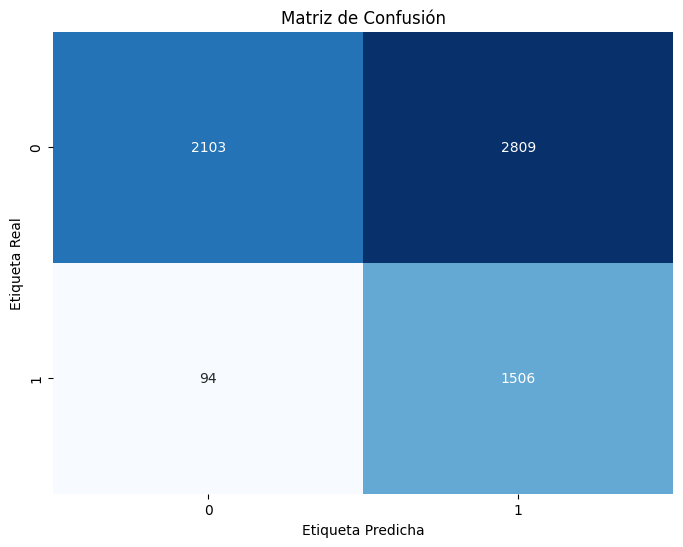

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()


11. Otras medidas de evaluación


In [61]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)


Matriz de Confusión:
[[2103 2809]
 [  94 1506]]


In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calcular precisión para la clase '>50K'
precision = precision_score(y_test, y_pred, pos_label=' >50K')

# Calcular recall para la clase '>50K'
recall = recall_score(y_test, y_pred, pos_label=' >50K')

# Calcular F1-Score para la clase '>50K'
f1 = f1_score(y_test, y_pred, pos_label=' >50K')

# Mostrar las medidas de evaluación para la clase '>50K'
print("Precisión para '>50K':", precision)
print("Recall para '>50K':", recall)
print("F1-Score para '>50K':", f1)


Precisión para '>50K': 0.34901506373117036
Recall para '>50K': 0.94125
F1-Score para '>50K': 0.5092138630600169


In [63]:
print("Conclusiones del modelo:")

# Exactitud del modelo
print(f"Exactitud del modelo: {accuracy:.2f}")
print("La exactitud del modelo representa la proporción de predicciones correctas sobre el total de predicciones realizadas por el modelo.")

# Precisión, recall y F1-Score para la clase '>50K'
print("Métricas para la clase '>50K':")
print(f"Precisión: {precision:.2f}")
print("La precisión para la clase '>50K' representa la proporción de verdaderos positivos sobre todos los positivos predichos por el modelo.")
print(f"Recall: {recall:.2f}")
print("El recall para la clase '>50K' representa la proporción de verdaderos positivos sobre todos los positivos reales en los datos.")
print(f"F1-Score: {f1:.2f}")
print("El F1-Score para la clase '>50K' es la media armónica de precisión y recall, proporcionando un equilibrio entre ambas métricas.")

# Matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)
print("La matriz de confusión proporciona una visión detallada del rendimiento del modelo en términos de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.")


Conclusiones del modelo:
Exactitud del modelo: 0.55
La exactitud del modelo representa la proporción de predicciones correctas sobre el total de predicciones realizadas por el modelo.
Métricas para la clase '>50K':
Precisión: 0.35
La precisión para la clase '>50K' representa la proporción de verdaderos positivos sobre todos los positivos predichos por el modelo.
Recall: 0.94
El recall para la clase '>50K' representa la proporción de verdaderos positivos sobre todos los positivos reales en los datos.
F1-Score: 0.51
El F1-Score para la clase '>50K' es la media armónica de precisión y recall, proporcionando un equilibrio entre ambas métricas.
Matriz de Confusión:
[[2103 2809]
 [  94 1506]]
La matriz de confusión proporciona una visión detallada del rendimiento del modelo en términos de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.


In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calcular precisión para la clase '>50K'
precision = precision_score(y_test, y_pred, pos_label=' <=50K')

# Calcular recall para la clase '>50K'
recall = recall_score(y_test, y_pred, pos_label=' <=50K')

# Calcular F1-Score para la clase '>50K'
f1 = f1_score(y_test, y_pred, pos_label=' <=50K')

# Mostrar las medidas de evaluación para la clase '>50K'
print("Precisión para '<=50K':", precision)
print("Recall para '<=50K':", recall)
print("F1-Score para '<=50K':", f1)


Precisión para '<=50K': 0.9572143832498862
Recall para '<=50K': 0.42813517915309446
F1-Score para '<=50K': 0.5916443944295963


12. Probabilidades de clases


In [65]:
# Obtener las probabilidades de las clases predichas para los datos de prueba
proba_pred = naive_bayes_classifier.predict_proba(X_test_encoded_scaled)

# Mostrar las probabilidades de las clases predichas para las primeras 5 muestras
print("Probabilidades de las clases predichas para las primeras 5 muestras:")
print(proba_pred[:5])


Probabilidades de las clases predichas para las primeras 5 muestras:
[[1.86227720e-08 9.99999981e-01]
 [2.13096505e-28 1.00000000e+00]
 [2.92900846e-24 1.00000000e+00]
 [2.26171075e-66 1.00000000e+00]
 [1.90563557e-10 1.00000000e+00]]


In [66]:
# Obtener las probabilidades de clases para los datos de prueba
class_probabilities = naive_bayes_classifier.predict_proba(X_test_encoded_scaled)

# Imprimir las probabilidades de clases
print("Probabilidades de clases para los datos de prueba:")
print(class_probabilities)

# Agregar conclusiones
print("\nConclusiones:")
print("Las probabilidades de clases representan la probabilidad estimada de que cada observación pertenezca a cada clase.")
print("Estas probabilidades pueden ser útiles para comprender la confianza del modelo en sus predicciones y para tomar decisiones basadas en la incertidumbre de las clasificaciones.")


Probabilidades de clases para los datos de prueba:
[[1.86227720e-08 9.99999981e-01]
 [2.13096505e-28 1.00000000e+00]
 [2.92900846e-24 1.00000000e+00]
 ...
 [1.00000000e+00 7.54120552e-31]
 [2.75861660e-06 9.99997241e-01]
 [1.72836328e-31 1.00000000e+00]]

Conclusiones:
Las probabilidades de clases representan la probabilidad estimada de que cada observación pertenezca a cada clase.
Estas probabilidades pueden ser útiles para comprender la confianza del modelo en sus predicciones y para tomar decisiones basadas en la incertidumbre de las clasificaciones.


In [67]:
# Obtener las clases predichas para los datos de prueba
predicted_classes = naive_bayes_classifier.predict(X_test_encoded_scaled)

# Obtener las probabilidades de clases para los datos de prueba
class_probabilities = naive_bayes_classifier.predict_proba(X_test_encoded_scaled)

# Seleccionar la clase con mayor probabilidad para cada observación
most_probable_classes = [naive_bayes_classifier.classes_[probs.argmax()] for probs in class_probabilities]

# Mostrar las clases con mayor probabilidad para cada observación
for i, (pred_class, probs) in enumerate(zip(predicted_classes, class_probabilities)):
    print(f"Observación {i+1}: Clase Predicha: {pred_class}, Probabilidades: {probs}")
    print(f"Clase con Mayor Probabilidad: {most_probable_classes[i]}\n")


Se han truncado las últimas 5000 líneas del flujo de salida.
Clase con Mayor Probabilidad:  >50K

Observación 4847: Clase Predicha:  >50K, Probabilidades: [2.80495509e-37 1.00000000e+00]
Clase con Mayor Probabilidad:  >50K

Observación 4848: Clase Predicha:  >50K, Probabilidades: [3.48316952e-15 1.00000000e+00]
Clase con Mayor Probabilidad:  >50K

Observación 4849: Clase Predicha:  >50K, Probabilidades: [2.81763159e-22 1.00000000e+00]
Clase con Mayor Probabilidad:  >50K

Observación 4850: Clase Predicha:  >50K, Probabilidades: [3.60852837e-13 1.00000000e+00]
Clase con Mayor Probabilidad:  >50K

Observación 4851: Clase Predicha:  >50K, Probabilidades: [7.12568535e-37 1.00000000e+00]
Clase con Mayor Probabilidad:  >50K

Observación 4852: Clase Predicha:  >50K, Probabilidades: [5.26729221e-19 1.00000000e+00]
Clase con Mayor Probabilidad:  >50K

Observación 4853: Clase Predicha:  >50K, Probabilidades: [3.60421759e-07 9.99999640e-01]
Clase con Mayor Probabilidad:  >50K

Observación 4854: Cl

13. Curvas ROC – AUC


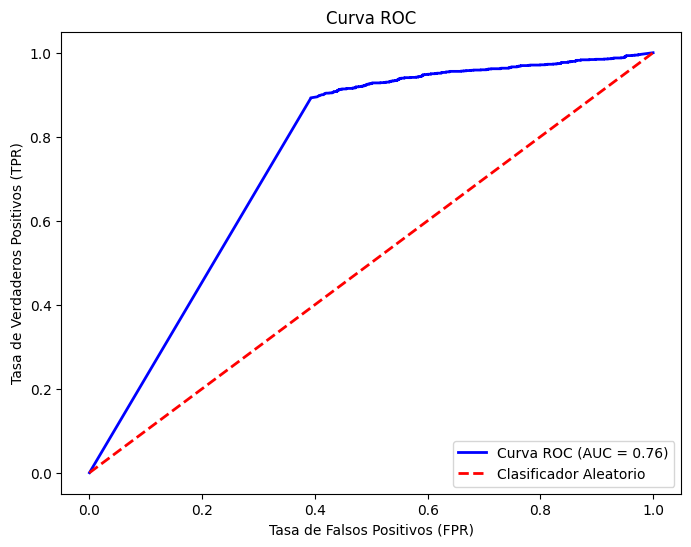

Área bajo la curva (AUC): 0.7554463558631922


In [68]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

# Codificar las etiquetas reales como valores binarios (0 y 1)
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

# Calcular las probabilidades de las clases positivas (clase '>50K') para los datos de prueba
positive_class_probs = class_probabilities[:, 1]  # Probabilidades de la clase positiva (columna 1)

# Calcular la curva ROC y el AUC con las etiquetas codificadas
fpr, tpr, thresholds = roc_curve(y_test_binary, positive_class_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC y mostrar el AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Clasificador Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

print("Área bajo la curva (AUC):", roc_auc)



  14. Validación cruzada k-fold

In [69]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB

# Definir el modelo de Naive Bayes Gaussiano
naive_bayes_classifier = GaussianNB()

# Definir el número de pliegues (k)
k = 5

# Definir el esquema de validación cruzada k-fold
k_fold = KFold(n_splits=k, shuffle=True, random_state=42)

# Realizar la validación cruzada k-fold
cross_val_scores = cross_val_score(naive_bayes_classifier, X_train_encoded_scaled, y_train, cv=k_fold, scoring='accuracy')

# Mostrar los resultados de la validación cruzada
print("Resultados de la validación cruzada k-fold:")
for i, score in enumerate(cross_val_scores):
    print(f"Fold {i+1}: {score:.2f}")

# Calcular y mostrar la precisión promedio de la validación cruzada
average_accuracy = cross_val_scores.mean()
print(f"Precision promedio: {average_accuracy:.2f}")


Resultados de la validación cruzada k-fold:
Fold 1: 0.52
Fold 2: 0.52
Fold 3: 0.55
Fold 4: 0.54
Fold 5: 0.55
Precision promedio: 0.54
